In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns

%matplotlib inline

In [2]:
salary_data=pd.read_csv('E:\Personal\DataScience\SalaryTestData.csv')

In [3]:
salary_data

,Experience,TestScore,InterviewScore,Salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


## Boxplot has been used to check if there are any outliers in the TestScore field
As we can see there are no outliers

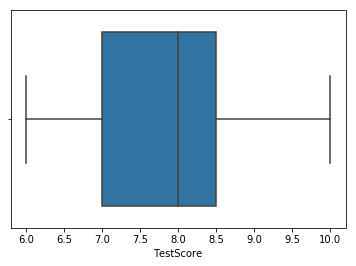

In [4]:
sns.boxplot(x=salary_data['TestScore'])

In [5]:
#Finding the median value for the field
salary_data['TestScore'].median()

8.0

In [6]:
#Filling the null value with median value
salary_data['TestScore']=salary_data['TestScore'].fillna(value=salary_data['TestScore'].median())

In [7]:
salary_data

,Experience,TestScore,InterviewScore,Salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


## Working with the NULL values in Experience field
We will be using word2number package since we need to convert the words(like five) to digits (5).

In [8]:
from word2number import w2n

In [9]:
salary_data['Experience']=salary_data[['Experience']].fillna(value='0',axis=1)

In [10]:
salary_data

,Experience,TestScore,InterviewScore,Salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [11]:
print(salary_data['Experience'][0])
print(type(salary_data['Experience'][0]))

0
<class 'str'>


In [12]:
#converting the words to numbers
salary_data['Experience']=salary_data['Experience'].apply(lambda x: w2n.word_to_num(x))

In [13]:
salary_data

,Experience,TestScore,InterviewScore,Salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [14]:
#Creating an object of Linear Regression 
reg=LinearRegression()

In [15]:
#training the data with independent variables and dependent variables
reg.fit(salary_data[['Experience','TestScore','InterviewScore']],salary_data[['Salary']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
#This is the coefficient
reg.coef_

array([[2812.95487627, 1845.70596798, 2205.24017467]])

In [17]:
#This is the intercept
reg.intercept_

array([17737.26346434])

In [18]:
#Now predicting the dependent variable.
reg.predict(salary_data[['Experience','TestScore','InterviewScore']])

array([[52350.0727802 ],
       [45734.35225619],
       [58312.95487627],
       [63872.63464338],
       [67270.74235808],
       [61148.47161572],
       [76069.1411936 ],
       [79241.63027656]])

## Predicting the target variable(salary) from the other three variables

In [19]:
salary_predict_data=pd.read_csv('E:\Personal\DataScience\SalaryDataToPredict.csv')

In [20]:
#Salary Variable is not present.
salary_predict_data

,Experience,TestScore,InterviewScore
0,3,8,9
1,5,8,6
2,2,6,7
3,5,10,10
4,6,9,6
5,2,7,10
6,2,5,7
7,5,7,8
8,6,5,6


In [21]:
#Now we will predict the salary from these variables from the model which we trained already.
reg.predict(salary_predict_data)

array([[60788.93740902],
       [59799.12663755],
       [49874.09024745],
       [72311.4992722 ],
       [64457.7874818 ],
       [58335.51673945],
       [48028.38427948],
       [62363.90101892],
       [57074.9636099 ]])

In [23]:
reg.predict([[3,8,9]])

array([[60788.93740902]])

In [ ]:
salary_predict_data['Salary']=reg.predict(salary_predict_data)

In [ ]:
salary_predict_data